# MPCS_51042_Final_Project - Video Game Sales Analysis

Author: Zizhan Li
| Email: zizhanl@uchicago.edu

Main goal: Analyze video game sales to explore changes in market trends.

# Dataset

In [5]:
import pandas as pd

In [7]:
# Import the dataset
raw_data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

# Print the raw data info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Macro-Level Analysis

The Dataset mainly contian three different part: 
1. Game information: Name, Platform, Year_of_Release, Genre, Publisher
2. Game sales: NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales (Physical Sales in Million)
3. Game feedback: Critic_Score, User_Score

# Data Preprocessing for market analysis data

In the data preprocessing stage, we will create two dataset to use in market anaylzing part and predicion model part. 

For market anaylzing part our first step is to check whether there are any NULL values in both the game information and game sales data. If any exist, we need to drop them.

In [14]:
# Count the NULL value in each column
raw_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In the next step, we need to check if there are any values in the "Global_Sales" data that are <= 0; if any exist, we need to drop them. 

In addition, we also drop some unuseful data for our analysis.

In [17]:
# Print out how many data we have for "Year_of_Release" column
print(raw_data["Year_of_Release"].value_counts())

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [19]:
# Check if there is any "Global_sales" data that <= 0
print((raw_data[raw_data["Global_Sales"] <= 0]).shape[0])

# Drop the unuseful data for market analyze ("Critic_Count", User_Count", "Developer", "Rating")
# Drop the samele sample size data
clean_data = raw_data.drop(columns = ["Critic_Count", "User_Count", "Developer", "Rating"])
clean_data = clean_data[clean_data["Year_of_Release"].apply(lambda x: x not in [2017, 2020])]
clean_data = clean_data[clean_data["Year_of_Release"].apply(lambda x: x >= 1995)]

# Select the column we need in market analysis part
vis_data_col = [
    "Name", 
    "Platform", 
    "Year_of_Release", 
    "Genre",  
    "NA_Sales", 
    "EU_Sales", 
    "JP_Sales", 
    "Publisher",
    "Other_Sales", 
    "Global_Sales"
]

# Drop the null value for market analysis data
vis_data = clean_data[vis_data_col]
vis_data = vis_data.dropna(subset = ["Year_of_Release", "Name", "Genre", "Publisher"])

0


In [21]:
# Print the market analysis data info
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15926 non-null  object 
 1   Platform         15926 non-null  object 
 2   Year_of_Release  15926 non-null  float64
 3   Genre            15926 non-null  object 
 4   NA_Sales         15926 non-null  float64
 5   EU_Sales         15926 non-null  float64
 6   JP_Sales         15926 non-null  float64
 7   Publisher        15926 non-null  object 
 8   Other_Sales      15926 non-null  float64
 9   Global_Sales     15926 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [23]:
# Print out all the unique value of categorical variable in market analysis data

# Genre
print(f"genre: {vis_data["Genre"].unique()}")
    
# Platform
print(f"Platform: {vis_data["Platform"].unique()}")

genre: ['Sports' 'Racing' 'Role-Playing' 'Platform' 'Misc' 'Simulation' 'Action'
 'Puzzle' 'Shooter' 'Fighting' 'Adventure' 'Strategy']
Platform: ['Wii' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'GBA' 'PS4' '3DS' 'N64' 'PS' 'XB' 'PC'
 'PSP' 'XOne' 'WiiU' 'GC' 'SNES' 'DC' 'PSV' 'SAT' 'WS' 'NG' 'TG16' '3DO'
 'PCFX']


# Macro-Level Analysis

1. Global Sales Trends: How did global game sales changed over years?

In [27]:
import matplotlib.pyplot as plt

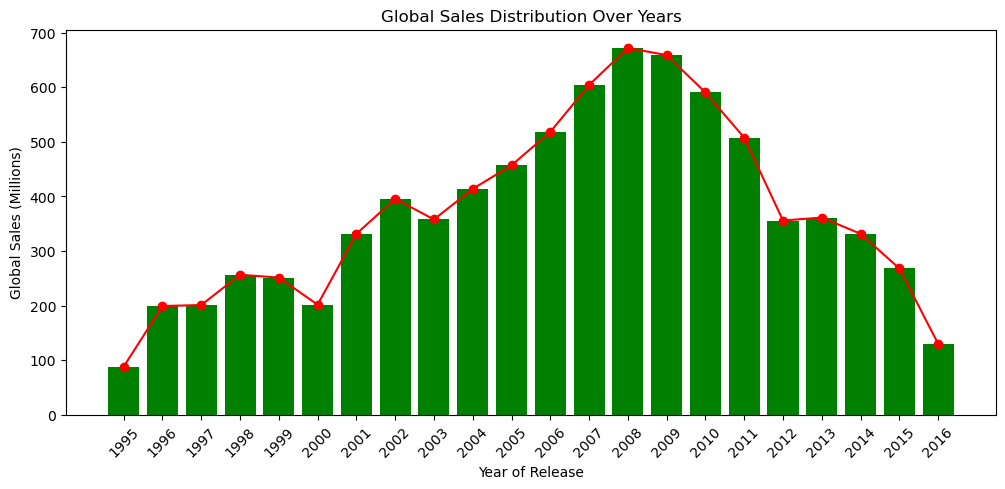

In [138]:
# Group the data by year, for each group calculate the sum of global sales
year_sales = vis_data.groupby("Year_of_Release", as_index = False)["Global_Sales"].sum()

# Plot the bar plot and scatter plot
plt.figure(figsize = (12, 5))
plt.bar(year_sales["Year_of_Release"], year_sales["Global_Sales"], color = "green")
plt.plot(year_sales["Year_of_Release"], year_sales["Global_Sales"], color = "red", marker = "o", label = "Trend Line")
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Sales Distribution Over Years")
plt.xticks(year_sales["Year_of_Release"], rotation = 45)
plt.show()

As we can see from the visualization result above, global physical game sales showed a significant upward trend from 1995 to 2008, and then gradually declined. 

This may seem a bit strange. Since given the development of the internet people's passion for games was actually increased, so why do we see a downward trend after 2009? Let's keep this question in mind. We will solve this question at the micro-level anaylze

2. Which publishers are the most competitive globally over time, and what are their market shares?

In [34]:
# Group the data by publisher, for each group calculate the sum of global sales
publisher_sales = vis_data.groupby("Publisher", as_index = False)["Global_Sales"].sum()

# Calculate market share for each publisher
publisher_sales["Market_Share"] = (publisher_sales["Global_Sales"] / publisher_sales["Global_Sales"].sum()) * 100
publisher_sales["Market_Share"] = publisher_sales["Market_Share"].round(2)

# Calculate how many game does each publisher released and rename the column
publisher_count = vis_data["Publisher"].value_counts().rename("Count")

# Merge the dataset by publisher
publisher_sales_top10 = publisher_sales.merge(publisher_count, on = "Publisher", how = "left")

# Calculate the average sales that each publisher has
publisher_sales_top10["Average"] = publisher_sales_top10["Global_Sales"] / publisher_sales_top10["Count"]
publisher_sales_top10["Average"] = publisher_sales_top10["Average"].round(2)

# Sort the data by ascending order of global sales
publisher_sales_top10 = publisher_sales_top10.sort_values("Global_Sales", ascending = False).head(10)

# Print TOP10 Publisher market share sum
print(f"T0P10 Publisher Market Share sum: {publisher_sales_top10["Market_Share"].sum()}")

T0P10 Publisher Market Share sum: 71.06


In [36]:
publisher_sales_top10

,Publisher,Global_Sales,Market_Share,Count,Average
342,Nintendo,1417.20,17.39,606,2.34
130,Electronic Arts,1099.34,13.49,1341,0.82
20,Activision,704.65,8.65,949,0.74
435,Sony Computer Entertainment,602.84,7.40,679,0.89
501,Ubisoft,470.16,5.77,929,0.51
471,Take-Two Interactive,403.58,4.95,421,0.96
466,THQ,338.11,4.15,712,0.47
263,Konami Digital Entertainment,263.37,3.23,801,0.33
310,Microsoft Game Studios,248.32,3.05,191,1.30
425,Sega,243.28,2.98,589,0.41


From the table above, we can see that the top 10 game publishers have dominated 71% of the global market over 22 years. Nintendo and EA are the two publishers with the largest market share, while Activision, Sony, and Ubisoft come after them.

We can also see that different publishers have different marketing strategies from this table. For example, EA and Activision tend to release a lot of games to get a wider gamers market, while Nintendo and Microsoft focus more on quality instead of quantity. They release fewer games, but the their high-quality also bring them a great market shares.

3. What is the market share distribution among different game genres globally, and which genre is the most popular?

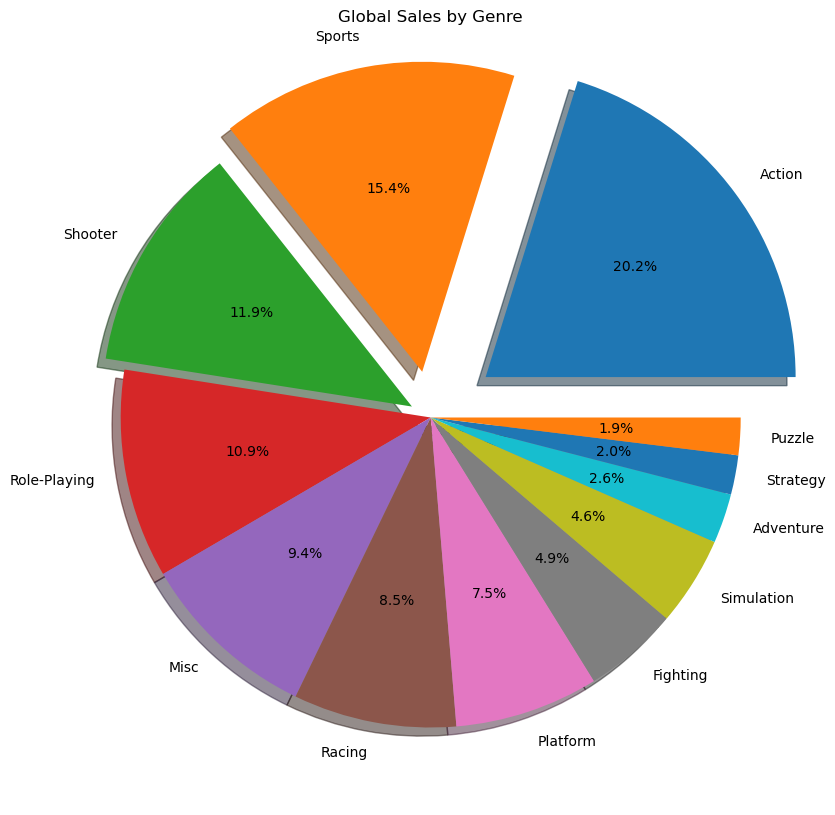

In [41]:
# Group the data by genre, for each group calculate the sum of global sales
genre_sales = vis_data.groupby("Genre", as_index = False)["Global_Sales"].sum()

# Calculate the market share for each genre
genre_sales["Global_Sales"] = (genre_sales["Global_Sales"] / genre_sales["Global_Sales"].sum()) * 100
genre_sales["Global_Sales"] = genre_sales["Global_Sales"].round(2)

# Sort the data by ascending order of global sales
genre_sales = genre_sales.sort_values("Global_Sales", ascending = False)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 12))
explode = (0.22, 0.15, 0.07, 0, 0, 0, 0, 0, 0, 0, 0, 0) # To control TOP3 genre stand out in pie chart
ax.pie(
    genre_sales["Global_Sales"],
    explode = explode,
    labels = genre_sales["Genre"],
    autopct = "%.1f%%", # Add percentage of market share in pie chart       
    shadow = True # Add shadow
)
plt.title("Global Sales by Genre")
plt.show()

From this pie chart, we can see that action games hold the highest share of global sales over the years, at approximately 20%. This indicate that this genre continues to maintain a strong market appeal. I believe this is because action game has a broad coverage including such as many action-adventure games and open world games, which will attract a large base of players. Sports, Shooter, and Role-playing games also taken nearly 40% of the market share together.

These result suggest that those aditional, mainstream genres still dominate the market.

# Micro-Level Analysis

1. What are the top 10 best-selling games globally and in other region each year and their sales?

In [46]:
import plotly.express as px
from dash import Dash, html, dcc, Input, Output, callback, dash_table

In [47]:
# Define the region list
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

# Define the year list
years = sorted(vis_data["Year_of_Release"].unique())

# Initialize Dash app
app = Dash()

# Create layout for output
app.layout = html.Div([
    
    # Add the Output Title
    html.H1("TOP10 Sales game"),
    
    # Add the Dropdown menu for year selection
    html.Label("Year"),
    dcc.Dropdown(
        id = "year-dropdown", # UID to make connection between component in layout with update function
        # Set up the option dictionary
        options = [{"label": i, "value": i} for i in years], value = years[0]),

    # Add the Dropdown menu for region selection
    html.Label("Region"),
    dcc.Dropdown(
        id = "region-dropdown",
        options = [{"label": i, "value": i} for i in regions], value = regions[0]),
    
    # Add the Maintabel output
    dash_table.DataTable(
        id = "top10-table",
        columns = [
            {"name": "Name", "id": "Name"},
            {"name": "Genre", "id": "Genre"},
            {"name": "Publisher", "id": "Publisher"},
            {"name": "Sales", "id": "Sales"}],
        data = []),

    # Add the graph output
    dcc.Graph(id = "graph")])

# The decorator to declare what is the output and the input
@app.callback([Output("top10-table", "data"), Output("graph", "figure")], 
              [Input("year-dropdown", "value"), Input("region-dropdown", "value")])
def update(year_dropdown, region_dropdown):
    """Update function that update the data based on different input we select

    Args:
        year_dropdown: different year we select
        region_dropdwon: different region we select

    Return:
        the output with title, dropdown menu, the table of TOP10 games sales and crossponding graph
        
    """
    # Filter the data by year_dropdown menu choice
    df_year = vis_data[vis_data["Year_of_Release"] == year_dropdown]
    
    # Group the data by name, for each group calculate the sum of regional sales and take the first value of genre and publisher
    df_groupby_name = df_year.groupby("Name", as_index = False).agg({
        region_dropdown: "sum",
        "Genre": "first",
        "Publisher": "first"
    })

    # Round the sum of region sales
    df_groupby_name[region_dropdown] = df_groupby_name[region_dropdown].round(2)

    # Sort grouped data by ascending order of region sales and take the top10 
    df_top10_game = df_groupby_name.sort_values(region_dropdown, ascending = False).head(10)

    # Rename the column in every iteration to match the defined column name in Dash table
    df_top10_game = df_top10_game.rename(columns = {region_dropdown: "Sales"})

    # Plot the bar plot
    fig = px.bar(df_top10_game,
                 x = "Sales",
                 y = "Name",
                 text = "Sales", 
                 title = f"{year_dropdown} Top10 Games in {region_dropdown}")
    
    return df_top10_game.to_dict("records"), fig

# Dash apps run on port 8050 by default, we can change port everytime we create a new interactive plot
app.run_server(port=8051)

2. What genres do these high-selling games belong to? Is there a trend of genre concentration?

In [49]:
from plotnine import ggplot, aes, geom_line, facet_wrap, geom_point, labs, theme

In [51]:
def top_10_concerntration(region):
    """plot the bubble plot of the count of TOP10 games genre in each year in differet regions

    Args:
        region: Different region's market

    Return:
        bubble plot of the count of TOP games genre in each year in different regions
        
    """
    # Creat empty list to store the result
    result_list = []

    # Define the genre list
    genres = vis_data["Genre"].unique()
    
    # Iterate through every region and every year, count how many time does TOP10 games' genre appeared 
    for region in regions:
        
        for year in years:
            
            # Filter data by year
            df_year = vis_data[vis_data['Year_of_Release'] == year]
            
            # Group data by name, for each name calculate the sum of region sales and take the first value of genre
            df_groupby_name = df_year.groupby("Name", as_index = False).agg({
            region: "sum",
            "Genre": "first"
            })
            
            # Sort grouped data by ascending order of region sales and take the top10 
            df_top10_game = df_groupby_name.sort_values(region, ascending=False).head(10)
        
            # Count the number of genre appear in sorted data
            genre_counts = df_top10_game["Genre"].value_counts()
        
            # Iterate through each genre in all genre list
            for genre in genres:
                # If this genre exist return its count, otherwise 0
                count = genre_counts.get(genre, 0)
                
                # Append (dicationary: key: curren year, genre and crosponding count value: the corresponding value) into our empty list
                result_list.append({
                    "year": year,
                    "genre": genre,
                    "count": count,
                    "region": region
                })
                
    # Create the dataframe with the count of different genere appeared time in each year in differnt region
    df_count = pd.DataFrame(result_list)

    # Plot the bubble plot for genre concerntration
    # facet_wrap() allow us to create multiple subplots
    plot = ggplot(df_count, aes(x = "year", y = "genre", size = "count", color = "genre")) + facet_wrap("~region") + geom_point(alpha = 0.8) + labs(title = f"{region} TOP10 Games' Genre Concerntration", x = "year", y = "genre") + theme(figure_size = (12, 8)) 

    return plot

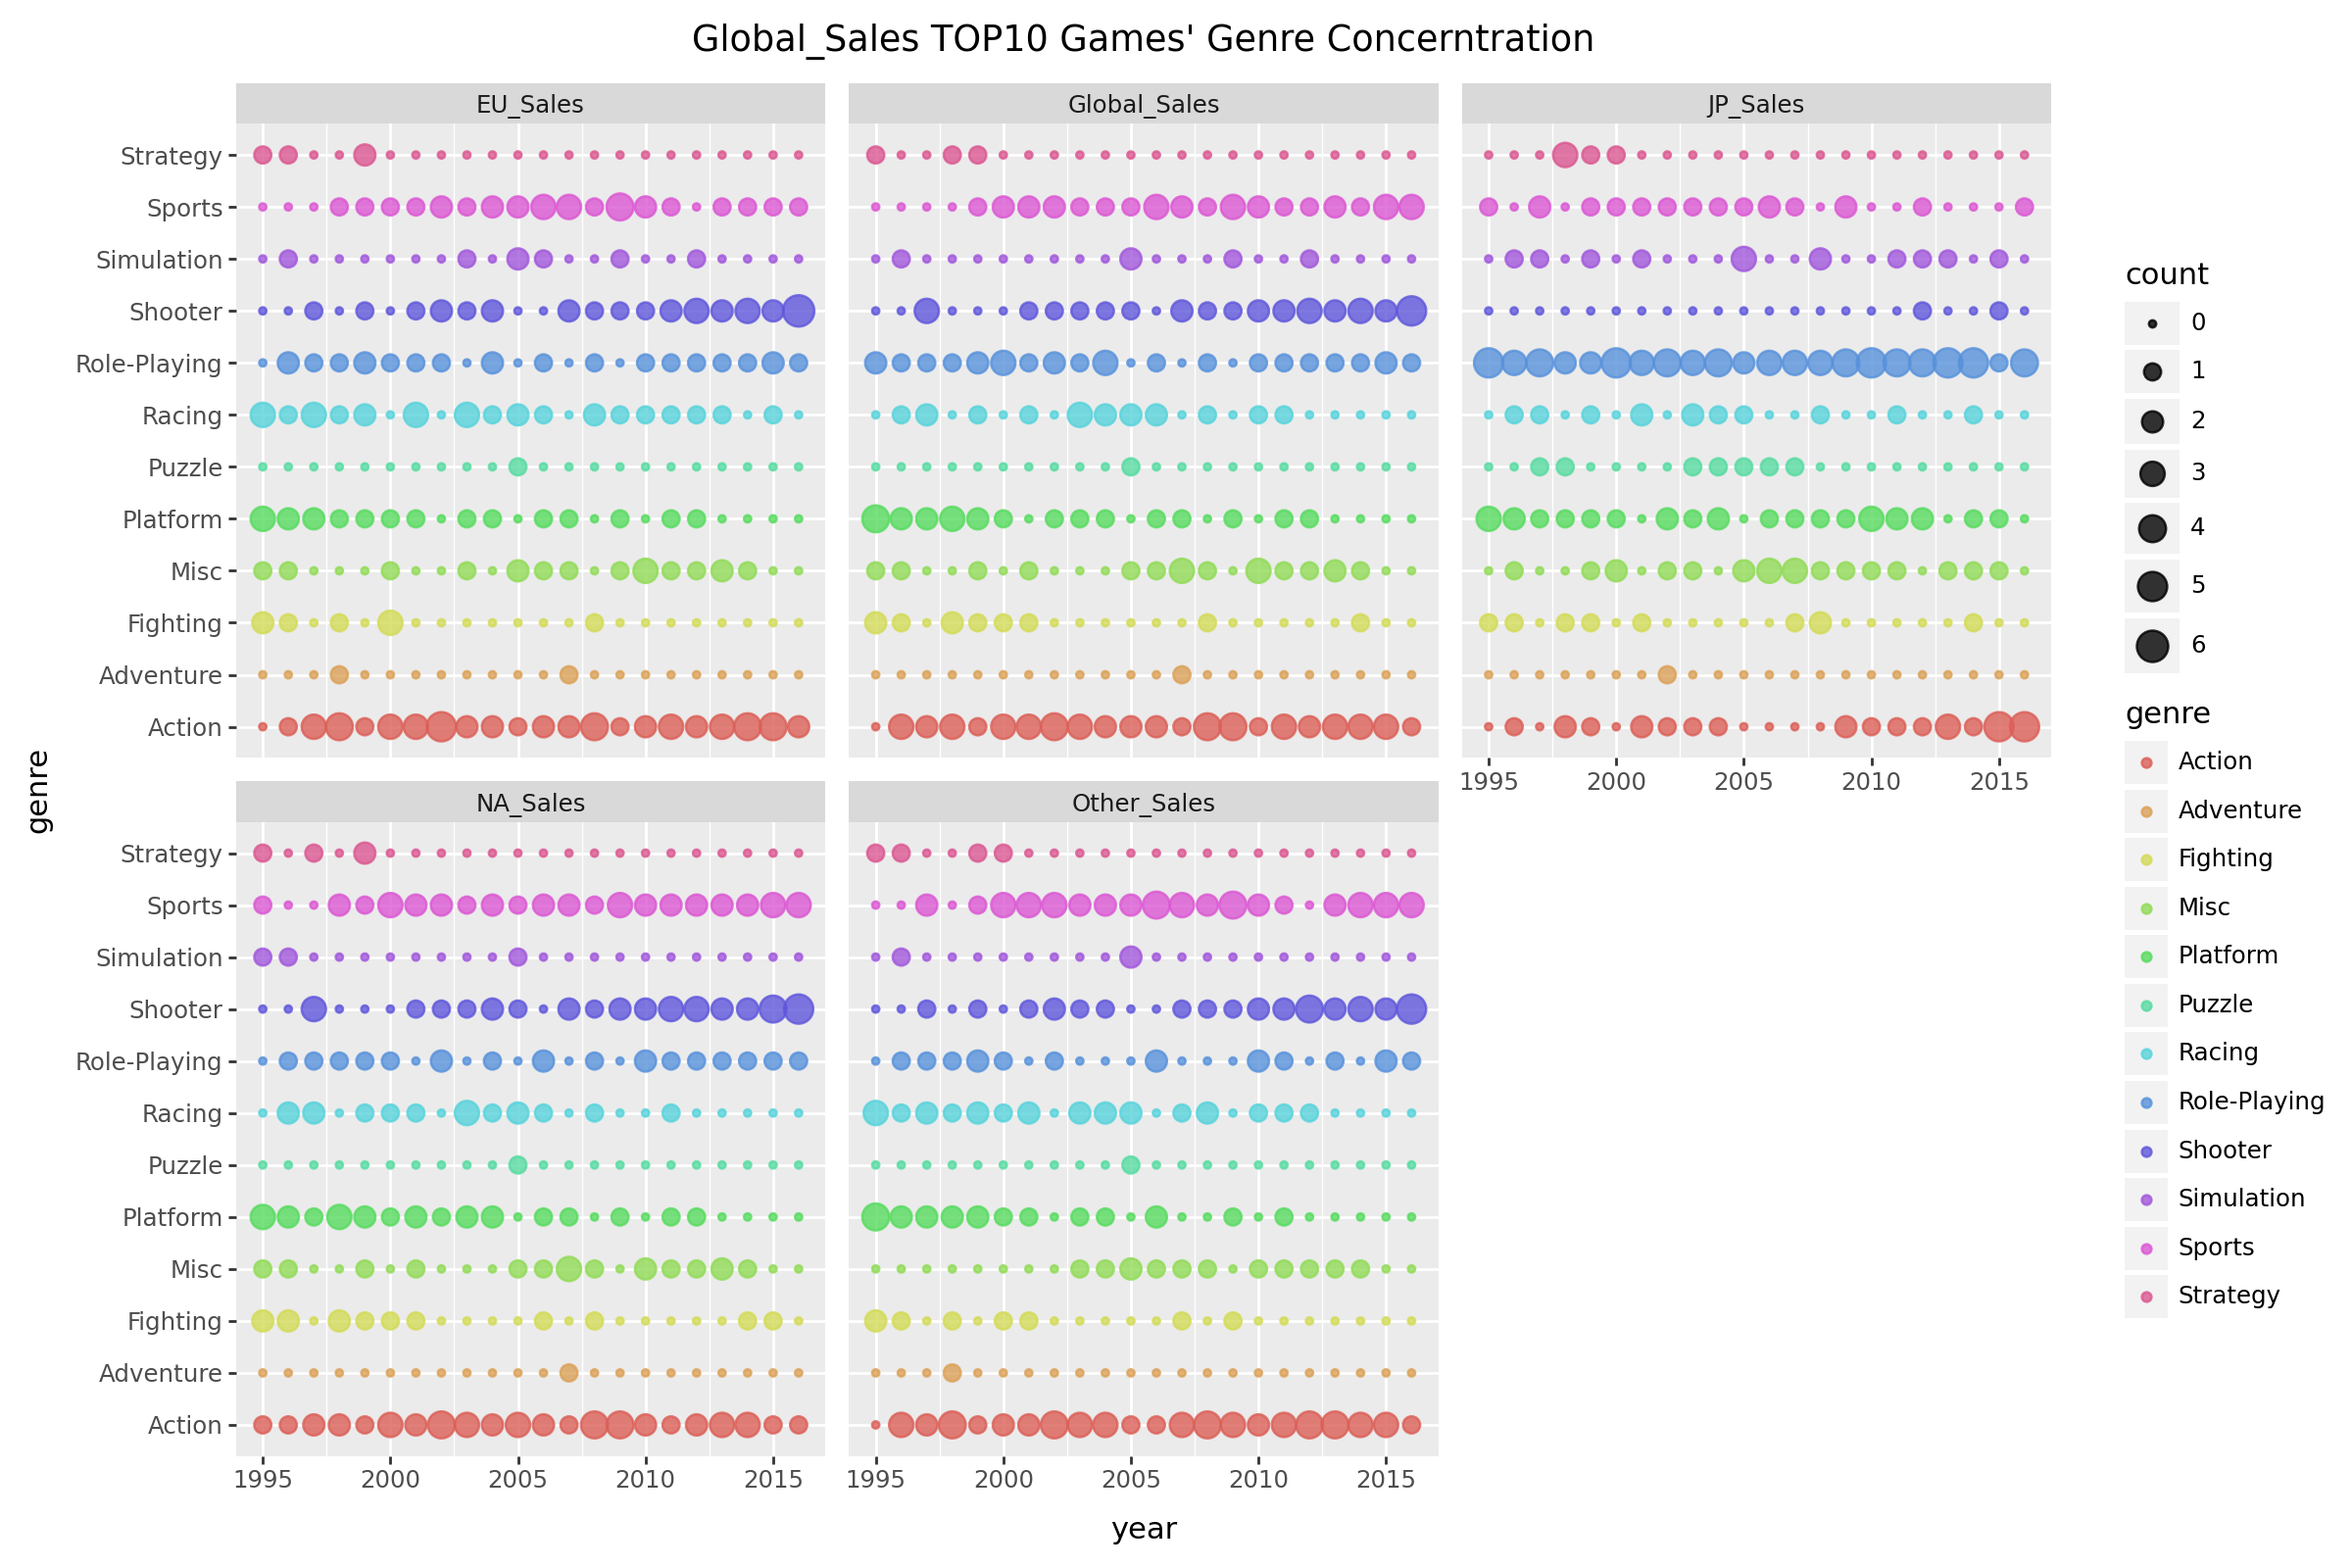

In [53]:
top_10_concerntration(regions)

In this bubble plot, the bubble size shows how often a game geners appear in the TOP10 list, the x-axis is the range of year and the y-axis is different game geners. Here is what we found:

In North America, Europe, globally, and in other regions, action, sports, and shooter games show a steady presence in the TOP 10 list.

Interestingly, in Japan, role-playing games are the biggest winner. It appear most frequently in the TOP10 list. In contrast, genres like action, shooter, and sports, which do really popular at other regions, don’t seem to be attractive in Japan.

Apart from these main genres, other types of games rarely can get into the TOP10 list which may suggest that their overall influence on the global stage is pretty limited

Next, let's widen our focus. Instead of just looking at the TOP10 rankings, we can now take a look how all game genres have changed over the years across different markets. 

3. How do the market shares of different game genres change each year? Which genres are growing or declining over time?

In [142]:
# Initialize Dash app
app = Dash()

# Create layout for output
app.layout = html.Div([
    # Add the Output Title
    html.H1("Genre Analyze"),

    # Add the Dropdown menu for region selection
    html.Label("Region"),
    dcc.Dropdown(
        id = "region-dropdown",
        options = [{"label": i, "value": i} for i in regions], value = regions[0]),

    # Add the Graph Output
    dcc.Graph(id = "graph")])

# The decorator to declare what is the output and the input
@app.callback(Output("graph", "figure"), Input("region-dropdown", "value"))
def update(region_dropdown):
    """Update function that update the data based on different input we select

    Args:
        region_dropdwon: different region we select

    Return:
        the output with the title, dropdown menu and the bar plot of different genre market shares changed over years
        
    """

    # Group the data by year and genre, for each group calculate the sum of region sales
    df_genre = vis_data.groupby(["Year_of_Release", "Genre"], as_index = False)[region_dropdown].sum()

    # Create the pivotal table to let the genre be the column and the datavalue is region sales
    df_genre_pivtol = df_genre.pivot(index = "Year_of_Release", columns = "Genre", values = region_dropdown)
    
    # Caclute the market share for each genre
    df_genre_pivtol_percent = df_genre_pivtol.apply(lambda x: (x / x.sum())* 100, axis=1)
    df_genre_plot = df_genre_pivtol_percent.reset_index()

    # Plot the bar plot
    fig = px.bar(df_genre_plot, 
                 x = "Year_of_Release", 
                 y = df_genre_plot.columns[1:], # We don't want our index in it after we reset_index()
                 title = f"Each genre's market share in {region_dropdown} over years",
                 barmode = "stack",
                 color_discrete_sequence = px.colors.qualitative.Light24) # Different color package in plotty
    return fig

app.run_server(port = 8052)

Based on the visualiztion results above, we can summarize our findings as follows:

[North American Market]
1. Action Games:
   The market share of action games increased steadily over time but began to decline after 2013. This decline may be due to increased competition from     other genres, such as the growth of shooter games.
   
2. Shooter Games:
   Shooter games benefit from its widespread popularity, with franchises like Call of Duty and Battlefield. Their market share increased steadily and       gradually stabilized at around 40% of the entire market. This trend potentially suggests that shooter games are poised to become one of the primary      genres in North America.

4. Sportes Games:
   Sports games experienced a sales peak in 2006. Let's take a look at our previous TOP10 games table, we can observe that this peak was                    mainly driven by Ninetendo's release of Wii Sports which made a huge success in the NA market. Beside this peak, the overall market share for sports     games maintained a medium to low level.

5. Role-Playing Games:
   Role-Playing games have not achieved the same level of popularity as action or shooter games in North America which maintaind a relativey low market     share.

The overall trends in the EU and other markets are similar to what we observed in North America.

[Japan Market]
1. Role-Playing Games:
   Like what we observed in the TOP10 list, the Japan market shows a strong preference for Role-Palying games, which have dominated the markedt share in    almost all years. I think this can reflect the local affinity for some classic domestic Role-Playing IPs, such as Final Fantasy.

In Contrast to Role-Playing Games, other genres like sports and shooter games have only take a small portion of the market share over the years

2. Action Games:
   Action Game in Japan market followed a steady upward trend. Rather than declining after 2013 like other market does, they expericend a huge increase     in 2015. According to the TOP10 table at previous, Capcom release the Monster Hunter X in that year. I think this may suggest that some established      domestic developers continuly have strong influence in Japan market.

3. how do the market shares of different gaming platforms change each year? Which platforms are performing well?

In [147]:
# Initialize Dash app
app = Dash()

# Create layout for output
app.layout = html.Div([
    # Add the Output Title
    html.H1("Platform Analyze"),

    # Add the Dropdown meanu for region selection
    html.Label("Region"),
    dcc.Dropdown(
        id = "region-dropdown",
        options = [{"label": i, "value": i} for i in regions], value = regions[0]),

    # Add the Graph Output
    dcc.Graph(id = "graph")])

# The decorator to declare what is the output and the input
@app.callback(Output("graph", "figure"), Input("region-dropdown", "value"))
def update(region_dropdown):
    """Update function that update the data based on different input we select

    Args:
        region_dropdwon: different region we select

    Return:
        the output with the title, dropdown menu and the bar plot of different platform market shares changed over years
        
    """

    # Group the data by year and platform, for each group calculate the sum of region sales
    df_platform = vis_data.groupby(["Year_of_Release", "Platform"], as_index = False)[region_dropdown].sum()

    # Create the pivotal table to let the platform be the column and the datavalue is region sales
    df_platform_pivtol = df_platform.pivot(index = "Year_of_Release", columns = "Platform", values = region_dropdown)
    
    # Caclute the market share for each platform
    df_platform_pivtol_percent = df_platform_pivtol.apply(lambda x: (x / x.sum())* 100, axis=1)
    df_platform_plot = df_platform_pivtol_percent.reset_index()

    # Plot the bar plot
    fig = px.bar(df_platform_plot, 
                 x = "Year_of_Release", 
                 y = df_platform_plot.columns[1:], 
                 title = f"Each platform's market share in {region_dropdown} over years",
                 barmode = "stack",
                 color_discrete_sequence = px.colors.qualitative.Light24)
    return fig

app.run_server(port = 8053)

Based on the platform analysis results above, we can summarize our findings as follows:

Between 1995 and 2000, Sony’s PlayStation was the most popular platform, with Nintendo’s N64 close behind. Then in 2000, when the PS2 was released, it gradually took over the lead from the PS, this trend continued until Nintendo released its DS mobile platform in 2004.

In 2006, Nintendo released its new home console, Will, while Sony introduced both the next-generation platform, the PS3, and the portable platform PSP. Microsoft also entered the market with its second platform, the Xbox 360. By the end of 2007, these five platforms were actively competing for market share.

Untill 2010, Nintendo’s Will and DS dominated the mainstream platform market, while the remaining share was shared by Microsoft’s Xbox 360 and Sony’s PSP and PS3.

After 2011, the PS3 and the PS4 take nearly half of the market and showed a strong upward trend. Meanwhile, Nintendo’s 3DS, which was released after 2011, did not have its earlier success.

Interestingly, the Xbox 360 and Xbox One maintained a steady market share over time. 

From our previous analysis, it’s clear that there are obvious relationships between different platforms: many of them are actually different products under the same company. 

To better understand the impact these companies have on the market, couldn’t we reclassify these platforms by grouping those products from the same company together?

Now let's recategory the data into different company

In [153]:
# Recategory the data
platform = [i for i in clean_data["Platform"].unique() if i != "PC"] # We do not want to drop the new PC column after we recategory the data
nintendo = ["Wii", "GB", "DS", "GBA", "3DS", "N64", "WiiU", "GC", "SNES"]
sony = ["PS", "PS2", "PS3", "PS4", "PSP", "PSV"]
microsoft = ["XB", "X360", "XOne"]
sega = ["DC", "SAT"]
other_platform = ["TG16", "PCFX","3DO", "WS", "NG"]
pc = ["PC"]

In [155]:
# Initialize Dash app
app = Dash()

# Create layout for output
app.layout = html.Div([
    # Add the Output Title
    html.H1("Platform Analyze with Option of Company"),

    # Add the Dropdown menu for region choice
    html.Label("Region"),
    dcc.Dropdown(
        id = "region-dropdown",
        options = [{"label": i, "value": i} for i in regions], value = regions[0]),

    # Add the Dropdown menu for recategory data by company, always return True at initial
    html.Label("company"),
    dcc.Dropdown(
        id = "company-dropdown",
        options = [{"label": "True", "value": True}, {"label": "False", "value": False}], value = True),
    
    # Add the Output Graph
    dcc.Graph(id = "graph")])

# The decorator to declare what is the output and the input
@app.callback(Output("graph", "figure"), [Input("region-dropdown", "value"), Input("company-dropdown", "value")])
def update_table(region_dropdown, company_dropdown):
    """Update function that update the data based on different input we select

    Args:
        company_dropdown: True: recategory the data otherwise False 
        region_dropdwon: different region we select

    Return:
        the output with title, dropdown menu, bar plot of different platform market shares changed over years
        or bar plot of the platform company shares changed over years.
        
    """
    
    # Group the data by year and platform, for each group calculate the sum of region sales
    df_platform = vis_data.groupby(["Year_of_Release", "Platform"], as_index = False)[region_dropdown].sum()

    # Create the pivotal table to let the platform be the column and the datavalue is region sales
    df_platform_pivtol = df_platform.pivot(index = "Year_of_Release", columns = "Platform", values = region_dropdown)
    
    # Caclute the market share for each platform
    df_platform_pivtol_percent = df_platform_pivtol.apply(lambda x: (x / x.sum())* 100, axis = 1)
    df_platform_plot = df_platform_pivtol_percent.reset_index()

    # If the choice of recategory data by company is False
    if company_dropdown == False:
        # Add new column "other" which combine the platforms with small market share
        df_platform_plot["other"] = df_platform_plot[other_platform].sum(axis=1)
        
        # Drop the orginal column
        df_platform_plot = df_platform_plot.drop(columns = other_platform)

        # Plot the bar plot
        fig = px.bar(df_platform_plot, 
                     x = "Year_of_Release", 
                     y = df_platform_plot.columns[1:], 
                     title = f"Each platform's market share in {region_dropdown} over years",
                     barmode = "stack",
                     color_discrete_sequence = px.colors.qualitative.Light24)
        
        return fig

    # If the choice of filter data by company is True
    else:
        # Recategory the data by company
        df_platform_plot["nintendo"] = df_platform_plot[nintendo].sum(axis = 1)
        df_platform_plot["sony"] = df_platform_plot[sony].sum(axis = 1)
        df_platform_plot["microsoft"] = df_platform_plot[microsoft].sum(axis = 1)
        df_platform_plot["sega"] = df_platform_plot[sega].sum(axis = 1)
        df_platform_plot["other_platform"] = df_platform_plot[other_platform].sum(axis = 1)
        df_platform_plot["PC"] = df_platform_plot[pc].sum(axis=1)
        df_platform_plot = df_platform_plot.drop(columns = platform)

        # Plot the bar plot
        fig = px.bar(df_platform_plot, 
                     x = "Year_of_Release", 
                     y = df_platform_plot.columns[1:], 
                     title = f"Each company's platform market share in {region_dropdown} over years",
                     barmode = "stack")
        return fig

app.run_server(port = 8054)

After selecting company = True, we obtained the ananlyze result for the company based data. 

Based on the analysis result shown above, we observed that the trends is actually similar to our previous findings, but result is presented in a more intuitive fomart.

Between 1995 and 2000, Sony and Nintendo dominated almost all the market share, with Sony leading for most of the time.

Since Microsoft joined the gaming market in 2001, it's clear that Sony's market share started to decline while Nintendo maintained a relatively stable share. During the period from 2006 to 2009, Nintendo’s platforms market share reached a historical high, while Sony dropped to its historical low. However, after 2010, Nintendo began to showing a downward trend, and Sony's market share started to recover back.

Surprisingly, the competition between Sony and Nintendo did not affect Microsoft's market share at all. It still stay stable year after year. This may suggests that:
1. Microsoft's platforms have a fixed user base.
2. There is a potential competitive relationship between Nintendo and Sony.

Since our data end at 2016, but given that Nintendo released the Switch in 2017, we can predict that Nintendo’s market share will have a significant increase in next several years.

Now, let's revisit our question that mentioned at previous: Why does the physical game sales declined since 2008? 

The analyze of platform can gives us some clues. We can observed that the market share of PC platform remained extremly low from 2010 to 2016, which is because our data only covers physical game sales. In the early stages, when the internet was not mature, most games still required physical cartridges to be played. However with the advancement of computer technology, more and more games are now available for direct download via the internet. This means that people no longer need physical cartridges to play games which implies that the gaming industry is gradually shifting from physical to digital sales. Additionally, many games are shifting from a one-time purchase model to a free-to-play model that includes in-game purchases, often called in-game stores. So based on these trends we can predict that physical game sales will continue to decline over time.

# Predict model building

PS: The main goal of the entire project is not in building predictive models; we are more focused on the market analysis during the market analysisi part. However, we will still attempt to build predictive models using some machine learning methods to investigate some information in game industry.

Two Question will be solved in this section 
1. Are user ratings, critic ratings and regional market share correlated with global game sales?
2. Can game sales be predicted based on genre, platform, ratings, and other features?

The first step in our model building is to preprocess the model data, which mainly involves three steps:
1. Drop the null values and outliers.
   
3. Calculate the market share in different regions.(Since the sum of regional sales equals global sales, if we directly use regional sales to build a predictive model, the results would be meaningless. Therefore, we convert regional sales into the regional market share to explore whether a region's market share is related to the prediction of global sales.)
   
4. Use OneHotEncoder to convert the categorical variables into 0 and 1 so that these variables can be used in regression models.

In [84]:
# Drop the null value for model data
model_data = clean_data.dropna(subset = ["Critic_Score", "User_Score", "Year_of_Release", "Name", "Genre", "Publisher"]) 

# Drop the unuseful data for model data
model_data = model_data[model_data["User_Score"] != "tbd"] # We found the "tbd" string when we doing the correlation matrix

# Drop the outlier
q1 = model_data["Global_Sales"].quantile(0.25)
q3 = model_data["Global_Sales"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper= q3 + 1.5 * iqr
model_data_clean = model_data[model_data["Global_Sales"].apply(lambda x: (x >= lower) & (x <= upper))]

# To see some statistical values of our model_data
print(model_data_clean[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].describe())

          NA_Sales     EU_Sales     JP_Sales  Other_Sales  Global_Sales
count  6208.000000  6208.000000  6208.000000  6208.000000   6208.000000
mean      0.209025     0.112626     0.029125     0.039367      0.390380
std       0.233258     0.155700     0.094113     0.059952      0.392084
min       0.000000     0.000000     0.000000     0.000000      0.010000
25%       0.050000     0.010000     0.000000     0.010000      0.100000
50%       0.120000     0.050000     0.000000     0.020000      0.240000
75%       0.290000     0.150000     0.000000     0.050000      0.560000
max       1.670000     1.580000     1.390000     1.180000      1.710000


In [86]:
# Iterate every region to calculate their market share
regions_without = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
for region in regions_without:
    model_data_clean[region] = model_data_clean[region] / model_data_clean["Global_Sales"]

# Change the User_Score to float type
model_data_clean["User_Score"] = model_data_clean["User_Score"].astype(float)

C:\Users\ROG\AppData\Local\Temp\ipykernel_84344\864921529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ROG\AppData\Local\Temp\ipykernel_84344\864921529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
# Define the categorical columns and numerical columns in response variables
categorical_cols = ["Platform", "Genre"]
numerical_cols = ["Critic_Score", "User_Score", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

# Transfer the categorical column into 0 and 1 by onehot encoder
encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder.fit_transform(model_data_clean[categorical_cols])
one_hot_data = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_cols), index = model_data_clean.index)

# Merge the categorical data after encoding with original numerical data
# Define the response variable and the target variable
numerical_data = model_data_clean[numerical_cols]
X = pd.concat([numerical_data, one_hot_data], axis = 1)
y = model_data_clean["Global_Sales"]

Here is how our dataset look like after onehot encoding the genre and platform

In [93]:
X 

,Critic_Score,User_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
1041,88.0,7.9,0.619883,0.292398,0.005848,0.081871,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,89.0,8.9,0.684211,0.228070,0.000000,0.087719,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,84.0,9.1,0.514620,0.198830,0.187135,0.105263,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1045,83.0,8.7,0.637427,0.321637,0.000000,0.040936,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1050,20.0,1.9,0.676471,0.235294,0.000000,0.088235,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,81.0,8.8,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16696,80.0,7.6,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16700,61.0,5.8,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16706,60.0,7.2,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


After, we finsihing done all the preprocessing. Let's first observe the corrlation between user ratings, critic ratings, regional sales and the global game sales?

In [96]:
import seaborn as sns

Correlation Matrix:
              Critic_Score  User_Score  NA_Sales  EU_Sales  JP_Sales  \
Critic_Score      1.000000    0.589699 -0.169654  0.146319  0.055714   
User_Score        0.589699    1.000000 -0.078503 -0.000480  0.135621   
NA_Sales         -0.169654   -0.078503  1.000000 -0.723264 -0.385288   
EU_Sales          0.146319   -0.000480 -0.723264  1.000000 -0.271333   
JP_Sales          0.055714    0.135621 -0.385288 -0.271333  1.000000   
Other_Sales       0.029628   -0.036111 -0.219142  0.172566 -0.171938   
Global_Sales      0.291104    0.144121 -0.012713 -0.028752  0.016787   

              Other_Sales  Global_Sales  
Critic_Score     0.029628      0.291104  
User_Score      -0.036111      0.144121  
NA_Sales        -0.219142     -0.012713  
EU_Sales         0.172566     -0.028752  
JP_Sales        -0.171938      0.016787  
Other_Sales      1.000000      0.204612  
Global_Sales     0.204612      1.000000  


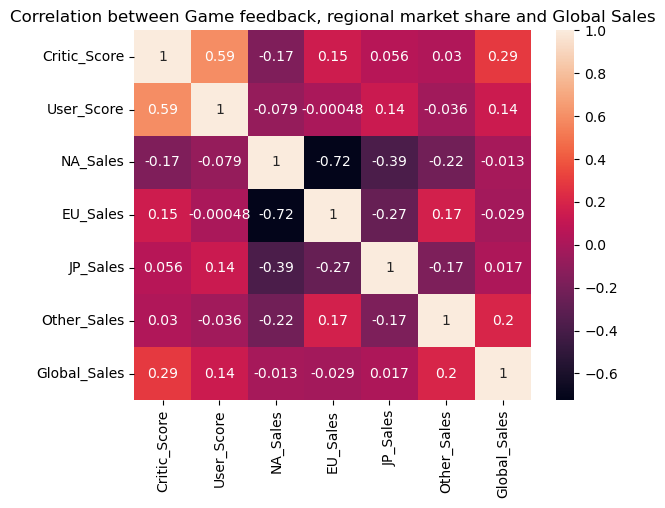

In [98]:
# Calculate the correlation matrix
corr_matrix = model_data_clean[["Critic_Score", "User_Score", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix 
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation between Game feedback, regional market share and Global Sales")
plt.show()

From the heatmap, we can see that both the Critic_Score and User Score have a positive correlation with Global Sales, but the correlation is not very strong, and the regional market share does not show any correlation with Global Sales except other sales show a small positive correlation with Global Sales. 

Next, let's split the dataset into training and testing sets, with 30% of the data used for testing and 70% used for training the model.

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
# Spilit the testing set and trainng set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

Now, let's start building our first regression model using simple linear regression.

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
# Fit the linear regression
regr = LinearRegression()
regr.fit(X_train, y_train)

# Predict the target variable
y_pred = regr.predict(X_test)

# Caculate the mse and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear regression MSE {mse}")
print(f"Linear regression R2 {r2}")

Linear regression MSE 0.12268173353957484
Linear regression R2 0.20832904173369482


The MSE of the linear regression model is 0.116 and the R² is 0.227, which means that the model can only explain about 22% of the variance in the target variable. The performance of linear regression model in this dataset is not good. This is likely due to the existence of too many non-linear relationship between response variable and target variable. Therefore, we will try to use another regression model, Random Forest Regressor.

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
# Fit the random forest regressor
random_forest_regr = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regr.fit(X_train, y_train)

# Predict the target variable
y_pred = random_forest_regr.predict(X_test)

# Caculate the mse and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest MSE {mse}")
print(f"Random Forest R2 {r2}")

Random Forest MSE 0.08119817541361007
Random Forest R2 0.4760243804475426


From the result of Random Forest, we can see that the MSE is 0.077 and the R² is 0.49. Compared to linear regression, the performance of Random Forest has greatly improved. I think this is mainly because Random Forest  generates its predictions by combining multiple decision trees, which enables it to better capture the nonlinear relationships. 

However, the overall performance of the regression model on this dataset is still unsatisfy. Could we try transforming the regression problem into a classification problem to release our range of Y from the singale data point to some interval and observe the model's performance and further investigate some potential issues within the dataset?

Here, we classify Global Sales which is out target variable Y into five categories: Low Sales, Medium Low Sales, Medium Sales, Medium High Sales, and High Sales. Their corresponding sales intervals are:
1. Low:  [0.0083, 0.35]
2. Medium Low: [0.35, 0.69]
3. Medium: [0.69, 1.03]
4. Medium Low: [1.03, 1.37]
5. High: [1.37, 1.71]

In [159]:
# Spilit the target variable Y into 5 different categories by calling the cut function in pandas
y_after_cut, bins = pd.cut(y, bins = 5, labels = ["Low","Medium_Low","Medium","Medium_High", "High"], retbins = True)
 
# Change the Y that after spiliting into float type
y_after_cut = y_after_cut.astype("category")
print(bins)

[0.0083 0.35   0.69   1.03   1.37   1.71  ]


Next, we split the new Y into testing and training sets and use a Random Forest Classifer for classification. 

In [123]:
# Spilit the testing set and trainng set
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_after_cut, test_size = 0.3, random_state = 104)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [127]:
# Fit the random forest classifer
random_forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
random_forest_clf.fit(X_train_clf, y_train_clf)
y_pred_random_forest = random_forest_clf.predict(X_test_clf)

# Print the accuracy and Classification report
print("Accuracy:", accuracy_score(y_test_clf, y_pred_random_forest))
print("Classification report:\n", classification_report(y_test_clf, y_pred_random_forest))

# Get the feature name in our X
features = X.columns

# Calculating the importance of featurecs by its builtin function
importances = random_forest_clf.feature_importances_

# Print the feature importance
df_feature = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values("Importance", ascending = False) 
important_feature = df_feature.head(10)
important_feature

Accuracy: 0.6827697262479872
Classification report:
               precision    recall  f1-score   support

        High       0.40      0.13      0.20        60
         Low       0.78      0.94      0.85      1147
      Medium       0.30      0.13      0.19       186
 Medium_High       0.29      0.10      0.15       115
  Medium_Low       0.45      0.43      0.44       355

    accuracy                           0.68      1863
   macro avg       0.44      0.35      0.37      1863
weighted avg       0.63      0.68      0.64      1863



,Feature,Importance
5,Other_Sales,0.190888
3,EU_Sales,0.149680
2,NA_Sales,0.141602
0,Critic_Score,0.131715
1,User_Score,0.107861
4,JP_Sales,0.067356
23,Genre_Action,0.015795
13,Platform_PS2,0.013887
33,Genre_Sports,0.013074
31,Genre_Shooter,0.012073


Based on the results of the random forest model, we can see that the prediction accuracy has indeed increased by 16% compared to the regression model. 

From the feature importance table, we observe that the most important feature affecting the predictions is the market share of Other region sales. Additionally, the market shares in Europe, North America and the game feedback also have releative signigicant impact for the predictions.

However, if we look at the classification report, we notice that this improvement is largely due to the high accuracy in the low sales interval. Why does this situation occur? Let's take a look at the distribution of Global Sales.

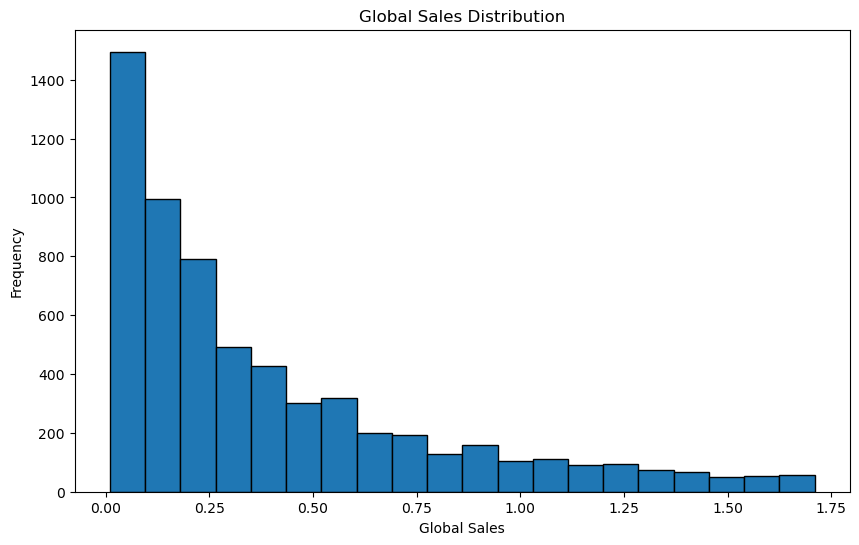

In [130]:
# Plot the Gobal Sales Distribution
plt.figure(figsize = (10, 6))
plt.hist(model_data_clean["Global_Sales"], bins = 20, edgecolor = "black")
plt.title("Global Sales Distribution")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()

From the distribution plot of the Global Sales, we can see that a large number of data samples are concentrated in the "low" interval, while the sample size in other interval are relatively small. This imbalance in the distribution allow the model to perform exceptionally well in the "low" interval thereby signigicantly increase the overall accuracy, but at the same time, it cover the poor predicitive performance in the other intervals. So, we can conclude that the response variables we select (platform, genre, region market share, and game feedback) only effective at distinguishing data in the "low" interval, but it is insufficient in other intervals.

Combined with the result of our regression model, we can say that if we just rely on the features like: platform, genre, region market share, and game feedback to predict games sales is insufficient. These features can only reflect part of the information of the game and they are not the key factors that determine sales. 

We can also find some evidence in real word. In reality, the performance of a game in market can be influenced by many more features, such as the company's marketing straegies and the quality of the game itself. For example, if a shooting game is released and it holds a large market share in the North American market, we can still not deduce from this information that it get huge success in global market. Therefore, our conclusion regarding the predictive model is that we cannot fully predict game sales based only on a game's platform, genre, regional market share, and game feedback, we still need more feature to get releativly meanningfull prediction.

# Conclusion

In this project, we analyzed physical game sales data. We observe the market changes from both macro and micro perspectives, as well as the shifts in market shares among different game genres and platforms, and built interactive visualizations using Dash and Plotly for a more intuitive and controllable result. Additionally, we use some machine learning models to predict the global game sales and and explored some issues present in the dataset. Below are some of my personal thoughts regarding this dataset.

This dataset is my backup option, because currently the only available source of game sales data online is VG Charts, and they have gradually stopped updating after 2016. I also noticed that many other websites offer APIs to obtain detailed game information, but none of them provide sales data (whether physical or digital). There are some consulting companies that offer complete sales data and game information, but I cannot access these as a student. So in the end, I chose this dataset for analysis, I believe the results can still reveal some trends and demonstrate some feasible methods for when a more comprehensive dataset might be available in the future.

In [135]:
# Citation
# https://dash.plotly.com/
# https://plotly.com/python/bar-charts/
# https://stackoverflow.com/questions/15001237/how-to-apply-first-and-last-functions-to-columns-while-using-group-by-in-pan
# https://realpython.com/ggplot-python/
# https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://www.geeksforgeeks.org/ml-one-hot-encoding/
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://www.geeksforgeeks.org/feature-importance-with-random-forests/